In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [32]:
# 시각화 설정
sns.set_theme()  # seaborn의 기본 테마 사용
plt.rcParams['figure.figsize'] = [12, 8]

# 한글 폰트 설정
import matplotlib.font_manager as fm
import matplotlib as mpl

# 한글 폰트 경로 설정 (Windows 기준)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 사용
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 마이너스 기호 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

In [5]:
df = pd.read_csv(r'C:\Users\현성\Documents\GitHub\data-analysis\uberAnalysisProject\data\rawData\uber.csv')

In [6]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,49:00.0,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,09:00.0,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,42:00.0,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,56:25.0,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695416,1


In [7]:
print("데이터 크기:", df.shape)

데이터 크기: (200000, 9)


In [8]:
print("데이터 컬럼:", df.columns.tolist())

데이터 컬럼: ['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


In [9]:
# 불필요한 컬럼 제거 및 기본 데이터 정리
df = df.drop('Unnamed: 0', axis=1)  # Unnamed: 0 컬럼 삭제

In [11]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
199995,49:00.0,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,09:00.0,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,42:00.0,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,56:25.0,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695416,1


In [12]:
df.shape

(200000, 8)

In [13]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [14]:
df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [15]:
df.isnull().sum()


key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [17]:
df.dropna(inplace=True)


In [18]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
199995,49:00.0,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,09:00.0,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,42:00.0,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,56:25.0,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695416,1


In [19]:
# datetime 전처리
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day_name()
df['month'] = df['pickup_datetime'].dt.month


In [20]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month
0,52:06.0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,Thursday,5
1,04:56.0,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,Friday,7
2,45:00.0,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,Monday,8
3,22:21.0,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,Friday,6
4,47:00.0,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,Thursday,8
...,...,...,...,...,...,...,...,...,...,...,...
199995,49:00.0,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,10,Sunday,10
199996,09:00.0,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1,Friday,3
199997,42:00.0,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,0,Monday,6
199998,56:25.0,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695416,1,14,Wednesday,5


In [21]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# 날짜와 시간에 요일 추가
df['pickup_datetime'] = df['pickup_datetime'].dt.strftime('%Y-%m-%d %H:%M:%S %A')

In [23]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month
0,52:06.0,7.5,2015-05-07 19:52:06 Thursday,-73.999817,40.738354,-73.999512,40.723217,1,19,Thursday,5
1,04:56.0,7.7,2009-07-17 20:04:56 Friday,-73.994355,40.728225,-73.994710,40.750325,1,20,Friday,7
2,45:00.0,12.9,2009-08-24 21:45:00 Monday,-74.005043,40.740770,-73.962565,40.772647,1,21,Monday,8
3,22:21.0,5.3,2009-06-26 08:22:21 Friday,-73.976124,40.790844,-73.965316,40.803349,3,8,Friday,6
4,47:00.0,16.0,2014-08-28 17:47:00 Thursday,-73.925023,40.744085,-73.973082,40.761247,5,17,Thursday,8
...,...,...,...,...,...,...,...,...,...,...,...
199995,49:00.0,3.0,2012-10-28 10:49:00 Sunday,-73.987042,40.739367,-73.986525,40.740297,1,10,Sunday,10
199996,09:00.0,7.5,2014-03-14 01:09:00 Friday,-73.984722,40.736837,-74.006672,40.739620,1,1,Friday,3
199997,42:00.0,30.9,2009-06-29 00:42:00 Monday,-73.986017,40.756487,-73.858957,40.692588,2,0,Monday,6
199998,56:25.0,14.5,2015-05-20 14:56:25 Wednesday,-73.997124,40.725452,-73.983215,40.695416,1,14,Wednesday,5


In [25]:
# 기본 통계량 확인
print("\n기본 통계량:\n", df.describe())


기본 통계량:
          fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  199999.000000     199999.000000    199999.000000      199999.000000   
mean       11.359892        -72.527631        39.935881         -72.525292   
std         9.901760         11.437815         7.720558          13.117408   
min       -52.000000      -1340.648410       -74.015515       -3356.666300   
25%         6.000000        -73.992065        40.734796         -73.991407   
50%         8.500000        -73.981823        40.752592         -73.980093   
75%        12.500000        -73.967154        40.767158         -73.963659   
max       499.000000         57.418457      1644.421482        1153.572603   

       dropoff_latitude  passenger_count           hour          month  
count     199999.000000    199999.000000  199999.000000  199999.000000  
mean          39.923890         1.684543      13.491387       6.281791  
std            6.794829         1.385995       6.515505       3.4389

In [26]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month
0,52:06.0,7.5,2015-05-07 19:52:06 Thursday,-73.999817,40.738354,-73.999512,40.723217,1,19,Thursday,5
1,04:56.0,7.7,2009-07-17 20:04:56 Friday,-73.994355,40.728225,-73.994710,40.750325,1,20,Friday,7
2,45:00.0,12.9,2009-08-24 21:45:00 Monday,-74.005043,40.740770,-73.962565,40.772647,1,21,Monday,8
3,22:21.0,5.3,2009-06-26 08:22:21 Friday,-73.976124,40.790844,-73.965316,40.803349,3,8,Friday,6
4,47:00.0,16.0,2014-08-28 17:47:00 Thursday,-73.925023,40.744085,-73.973082,40.761247,5,17,Thursday,8


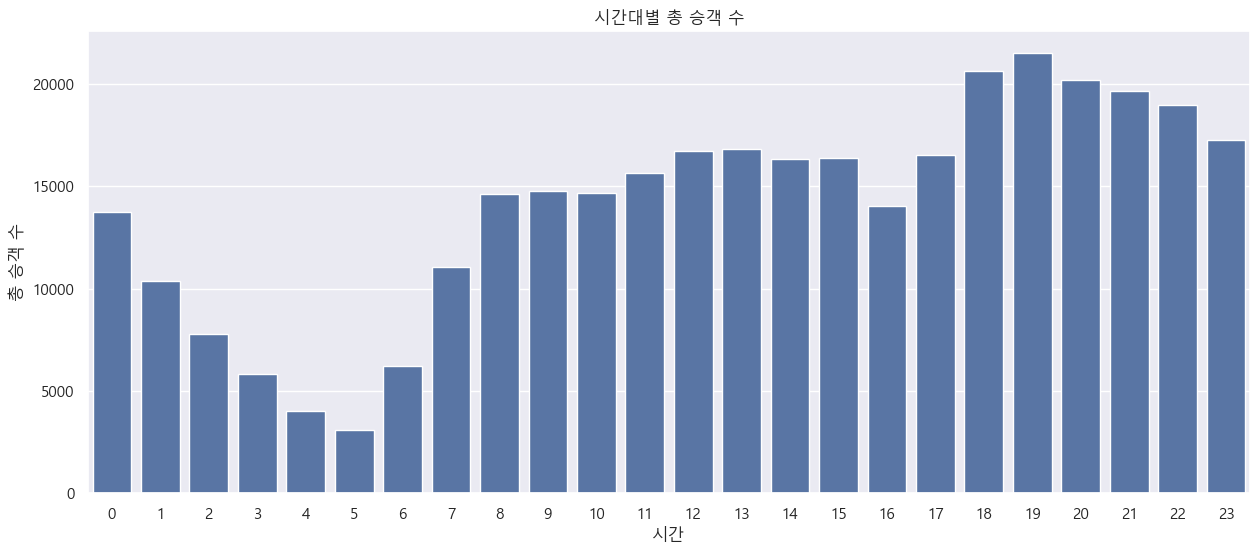

In [33]:
plt.figure(figsize=(15, 6))
houly_demand = df.groupby('hour')['passenger_count'].sum()
sns.barplot(x=houly_demand.index, y=houly_demand.values)
plt.title('시간대별 총 승객 수')
plt.xlabel('시간')
plt.ylabel('총 승객 수')
plt.show()



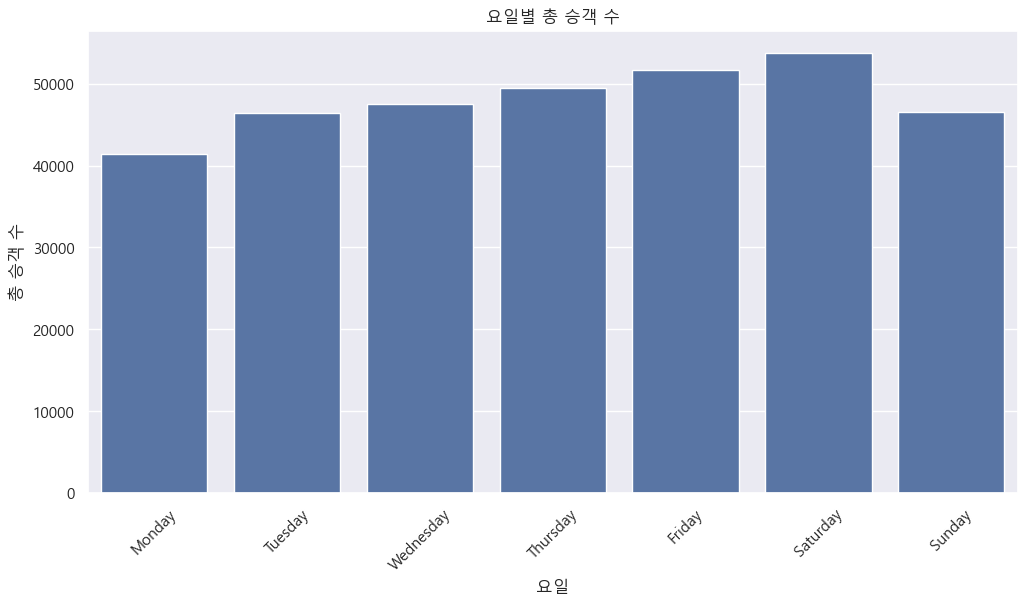

In [37]:
# 요일 순서 정의
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 요일별 수요 분석 (요일 순서대로 정렬)
plt.figure(figsize=(12, 6))
daily_demand = df.groupby('day')['passenger_count'].sum()
daily_demand = daily_demand.reindex(day_order)  # 요일 순서대로 재정렬

# 바 플롯 생성
sns.barplot(x=daily_demand.index, y=daily_demand.values)
plt.title('요일별 총 승객 수')
plt.xlabel('요일')
plt.ylabel('총 승객 수')
plt.xticks(rotation=45)
plt.show()

In [38]:
import os
processed_data_dir = '../../data/processedData'
# 전처리된 데이터 저장
processed_data_path = os.path.join(processed_data_dir, 'processed_uber_data.csv')
df.to_csv(processed_data_path, index=False)
